# **Load data from Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

D = pd.read_csv("/content/drive/MyDrive/data/KCV.csv").values

X = D[:, :2]
Y = D[:, 2]

# **Fitting an SVM model**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = SVC(kernel='poly', degree =2, C=1, coef0=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
acc= accuracy_score(Y_test, Y_pred)

print(acc)



0.864


# **K-fold cross-validation**

In [ ]:
from sklearn.model_selection import KFold
import numpy as np


K=10 #K-foldCV

alphas = np.array([0.0, 1.0]) # Candidates for values of hyper-parameter

N = len(alphas) # Number of lasso parameters
scores = np.zeros((N,K))
kf = KFold(n_splits=10)

for i in range(N):
   clf = SVC(kernel='poly', degree =2, C=1, coef0=alphas[i])
   for j, (train, test) in enumerate(kf.split(X)):
      X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
      clf.fit(X_train,Y_train)
      Y_pred = clf.predict(X_test)

      scores[i,j] = accuracy_score(Y_test, Y_pred)

# Compute average CV score for each parameter
scores_avg = scores.mean(axis=1)

array([0.688, 0.82 ])

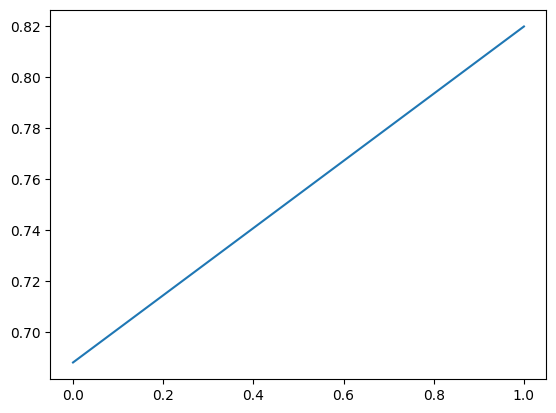

In [ ]:
import matplotlib.pyplot as plt
plt.plot(alphas, scores_avg)

scores_avg